## Coding Exercise #0307

### 1. Classification with logistic regression:

In [1]:
# Importación de bibliotecas necesarias para la manipulación de datos, visualización y modelado.

# 'numpy' es una biblioteca para el manejo de arrays multidimensionales y operaciones matemáticas.
import numpy as np

# 'pandas' es una biblioteca para la manipulación y análisis de datos, especialmente para trabajar con DataFrames.
import pandas as pd

# 'matplotlib.pyplot' es una biblioteca para la creación de gráficos estáticos en Python.
import matplotlib.pyplot as plt

# 'seaborn' es una biblioteca para la visualización estadística, basada en matplotlib, que proporciona gráficos más atractivos y fáciles de interpretar.
import seaborn as sns

# 'load_breast_cancer' carga el dataset de cáncer de mama desde sklearn, que contiene datos para clasificar tumores como benignos o malignos.
from sklearn.datasets import load_breast_cancer

# 'train_test_split' es una función para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# 'LogisticRegression' es un modelo de regresión logística que se usa para clasificación binaria.
from sklearn.linear_model import LogisticRegression

# 'metrics' proporciona herramientas para la evaluación del rendimiento de los modelos de clasificación (por ejemplo, matriz de confusión, precisión, etc.).
from sklearn import metrics

%matplotlib inline

#### 1.1. Read in data and explore:

In [2]:
# Load data.
data = load_breast_cancer()

In [3]:
# Display the description.
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X.shape

(569, 30)

In [6]:
print(data['target_names'])
print(data['target'])

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [7]:
# Se invierte el valor de las etiquetas del conjunto de datos.
# Originalmente, 'data['target']' tiene valores 0 y 1, donde 0 significa 'maligno' y 1 significa 'benigno'.
# Al restar 1 a las etiquetas (1 - data['target']), cambiamos las etiquetas de modo que:
# - Los 1s (benigno) se convierten en 0 (ya no benigno),
# - Los 0s (maligno) se convierten en 1 (ya no maligno).
Y = 1 - data['target']

# Accedemos a las etiquetas de clase del conjunto de datos, que están almacenadas en 'data['target_names']'.
# Esta lista contiene las clases en orden: ['malignant', 'benign'].
label = list(data['target_names'])  # Convertimos las clases a una lista.

# Revertimos el orden de la lista 'label'. Después de la inversión, el primer valor será 'benigno'
# y el segundo 'maligno', ya que ahora estamos asignando las clases al revés.
label.reverse()

# Imprimimos la lista 'label', que ahora contiene las clases en el orden invertido.
# El resultado será: ['benign', 'malignant'].
print(label)
print(Y)

[np.str_('benign'), np.str_('malignant')]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0

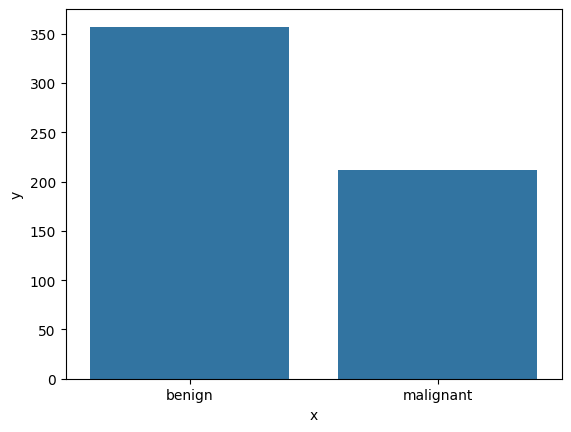

0    357
1    212
Name: count, dtype: int64

In [ ]:
# Convertimos el array 'Y' (que contiene las etiquetas invertidas) a una serie de pandas (pd.Series).
# Esto nos permite utilizar las funciones de pandas para manejar y analizar los datos de manera más eficiente.
ser = pd.Series(Y)

# Creamos una tabla de frecuencias con el método 'value_counts()', que cuenta cuántas veces aparece cada valor (0 o 1) en 'Y'.
# 'value_counts()' devuelve una Serie con las frecuencias de cada valor.
table = ser.value_counts()

# Ordenamos la tabla de frecuencias usando 'sort_index()' para asegurarnos de que las clases estén en orden.
# Esto es importante para que el gráfico sea correcto, ya que '0' y '1' deben estar ordenados en el eje X.
table = table.sort_index()

# Creamos un diccionario con las etiquetas ('x') y las frecuencias ('y') para pasarlas al gráfico.
# 'label' contiene los nombres de las clases ('benign' y 'malignant'), mientras que 'table.values' tiene las frecuencias de cada clase.
raw_data = {'x': label, 'y': table.values}

# Usamos seaborn (sns) para crear un gráfico de barras. 'x' es el eje horizontal con las clases (benign, malignant),
# y 'y' es el eje vertical con las frecuencias de cada clase.
sns.barplot(x='x', y='y', data=raw_data)

# Finalmente, mostramos el gráfico con plt.show(). Esto muestra el gráfico en la pantalla.
plt.show()

#### 1.2. Train and test:

In [9]:
# Dividir el dataset en dos conjuntos: entrenamiento y prueba.

# 'train_test_split' es una función que divide los datos en dos subconjuntos: uno para entrenamiento y otro para prueba.
# Los parámetros principales que utiliza son las características (X) y las etiquetas (Y).
# En este caso, se pasa X e Y como los datos que se deben dividir en conjuntos de entrenamiento y prueba.

# X representa las características (o variables independientes) del conjunto de datos.
# Y representa las etiquetas (o variable dependiente), que son las que queremos predecir.

X_train, X_test, Y_train, Y_test = train_test_split(
    X,  # Conjunto de datos con las características (independientes).
    Y,  # Conjunto de datos con las etiquetas (dependientes).
    test_size=0.4,  # El 40% de los datos se usarán para el conjunto de prueba, y el 60% restante para el entrenamiento.
    random_state=1234  # Especificamos una semilla aleatoria para que la división sea reproducible.
)

# El resultado de esta división es que:
# - X_train contiene el 60% de las características para entrenamiento.
# - X_test contiene el 40% restante de las características para prueba.
# - Y_train contiene las etiquetas correspondientes al 60% de los datos de entrenamiento.
# - Y_test contiene las etiquetas correspondientes al 40% de los datos de prueba.

# Los datos de entrenamiento (X_train, Y_train) se utilizarán para entrenar el modelo de regresión logística.
# Los datos de prueba (X_test, Y_test) se utilizarán para evaluar el rendimiento del modelo, es decir,
# para verificar qué tan bien el modelo puede predecir las etiquetas de datos que no ha visto antes.

# De esta manera, garantizamos que el modelo no se entrene y evalúe con los mismos datos, lo que ayuda a evitar el sobreajuste.

In [10]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [11]:
# Crear y entrenar el modelo de regresión logística, luego realizar predicciones sobre el conjunto de prueba.

# Se crea un objeto 'LL' que es un modelo de regresión logística de la biblioteca scikit-learn.
# 'solver' define el algoritmo que se usará para resolver el modelo. 'liblinear' es un buen algoritmo para datasets pequeños o medianos.
# 'max_iter' especifica el número máximo de iteraciones que el algoritmo de optimización realizará. Se establece en 200 para asegurar convergencia.
LL = LogisticRegression(solver='liblinear', max_iter=200)

# El modelo 'LL' se entrena usando los datos de entrenamiento (X_train, Y_train).
# 'fit' ajusta los parámetros del modelo de regresión logística a los datos de entrenamiento, es decir, aprende la relación entre X_train y Y_train.
LL.fit(X_train, Y_train)

# Después de entrenar el modelo, se utiliza para predecir las etiquetas de los datos de prueba.
# 'predict' toma las características del conjunto de prueba (X_test) y genera predicciones sobre sus etiquetas.
Y_pred_test = LL.predict(X_test)  # Predicciones para los datos fuera de muestra (conjunto de prueba).

In [12]:
# Crear la matriz de confusión para evaluar el rendimiento del modelo en el conjunto de prueba.
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test)

# Mostrar la matriz de confusión en la consola.
print(conf_mat)

[[139   5]
 [ 12  72]]


In [13]:
# Calcular las métricas de rendimiento utilizando la matriz de confusión.

# 'accuracy' o precisión global: Es la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones.
# Se calcula como (verdaderos positivos + verdaderos negativos) / total de muestras.
accuracy = (conf_mat[0,0] + conf_mat[1,1]) / np.sum(conf_mat)

# 'sensitivity' o sensibilidad (también conocida como recall o tasa de verdaderos positivos): Mide la capacidad del modelo para detectar correctamente los casos positivos.
# Se calcula como verdaderos positivos / (verdaderos positivos + falsos negativos).
sensitivity = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

# 'specificity' o especificidad: Mide la capacidad del modelo para detectar correctamente los casos negativos.
# Se calcula como verdaderos negativos / (verdaderos negativos + falsos positivos).
specificity = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])

# 'precision' o precisión (también conocida como valor predictivo positivo): Mide cuántos de los casos que el modelo clasificó como positivos son realmente positivos.
# Se calcula como verdaderos positivos / (falsos positivos + verdaderos positivos).
precision = conf_mat[1,1] / (conf_mat[0,1] + conf_mat[1,1])

# Imprimir las métricas calculadas.
# Utilizamos 'np.round' para redondear los valores a 3 decimales y hacer que la salida sea más legible.
print('Accuracy    = {}'.format(np.round(accuracy, 3)))
print('Sensitivity = {}'.format(np.round(sensitivity, 3)))
print('Specificity = {}'.format(np.round(specificity, 3)))
print('Precision   = {}'.format(np.round(precision, 3)))

Accuracy    = 0.925
Sensitivity = 0.857
Specificity = 0.965
Precision   = 0.935


In [14]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Precision   = 0.935


#### 1.3. Cutoff (threshold):

In [15]:
# Predecir la probabilidad de que Y = 1 (clase positiva) para el conjunto de prueba.
# LL.predict_proba() devuelve las probabilidades de que cada observación pertenezca a cada clase.
# Seleccionamos solo la columna que representa la probabilidad de la clase positiva (Y=1).
Y_pred_test_prob = LL.predict_proba(X_test)[:, 1]

# Se puede cambiar el umbral (cutoff) según se desee.
# El cutoff define el valor mínimo de probabilidad para clasificar una observación como clase positiva (1).
cutoff = 0.7  # cutoff puede ser un valor entre 0 y 1.

# Predecir las clases en función del umbral elegido (cutoff).
# Si la probabilidad de clase positiva es mayor que el cutoff, asignamos clase 1 (positivo), de lo contrario, clase 0 (negativo).
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)

# Calcular la matriz de confusión basada en las predicciones de clases.
# La matriz de confusión compara las predicciones de clase con las verdaderas etiquetas de clase.
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test_val)

# Imprimir la matriz de confusión.
# La matriz de confusión nos muestra el rendimiento del modelo en términos de Verdaderos Positivos (TP),
# Falsos Positivos (FP), Verdaderos Negativos (TN) y Falsos Negativos (FN).
print(conf_mat)

[[143   1]
 [ 13  71]]


In [16]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.939
Sensitvity  = 0.845
Specificity = 0.993
Precision   = 0.986


#### 1.4. ROC curve:

In [17]:
# Inicializar un rango de umbrales (cutoff_grid) y listas para almacenar los valores de TPR y FPR.
cutoff_grid = np.linspace(0.0, 1.0, 100)  # Crear una secuencia de 100 valores entre 0 y 1.
TPR = []  # Lista para almacenar el True Positive Rate (TPR) en cada corte.
FPR = []  # Lista para almacenar el False Positive Rate (FPR) en cada corte.

In [18]:
# Rellenar las listas de TPR (True Positive Rate) y FPR (False Positive Rate) para diferentes umbrales.
for cutoff in cutoff_grid:
    # Predecir las clases basadas en el umbral actual.
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)

    # Calcular la matriz de confusión.
    conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test_val)

    # Calcular la sensibilidad (TPR).
    sensitivity = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

    # Calcular la especificidad.
    specificity = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])

    # Almacenar el TPR y el FPR en las listas correspondientes.
    TPR.append(sensitivity)
    FPR.append(1 - specificity)

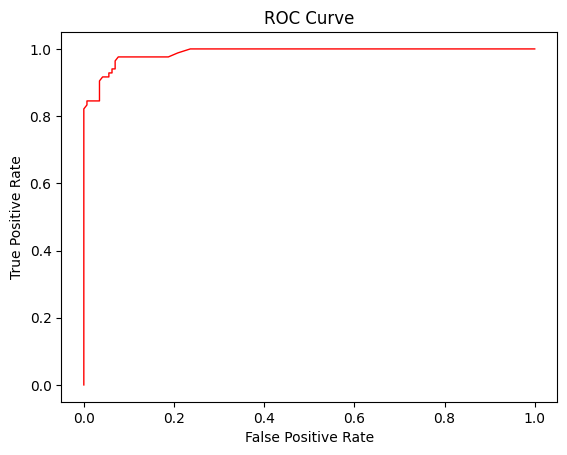

In [19]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### 1.5. ROC curve (sklearn):

In [20]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

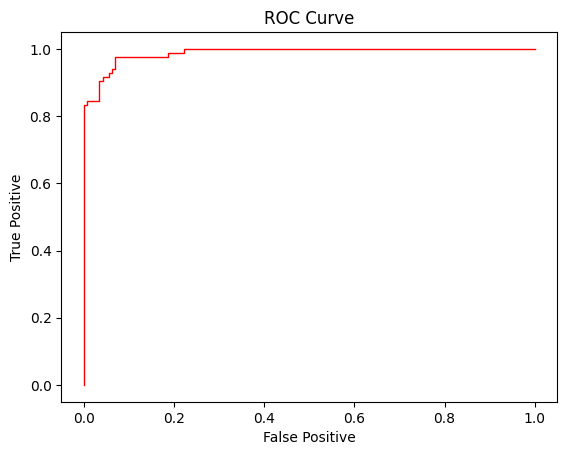

In [21]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [22]:
# AUC.
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.989
